In this question you are asked to evaluate the coefficients for the first derivative $\frac{\partial u}{\partial x}$ using the Lagrange interpolating polynomials. For this purpose we use the code provided in Week $2$.

In [2]:
import numpy as np
import jax
import jax.numpy as jnp


jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

import niceplots

plt.style.use(niceplots.get_style())
colors = niceplots.get_colors_list()

In [3]:
def get_lagrange_func(xPoints, i):
    """Create a function that computes the ith Lagrange polynomial for a given set of points.

    Parameters
    ----------
    xPoints : list/array of floats
        X coordinate values of the points to be interpolated
    i : int
        The index of the lagrange polynomial to create (must be between 0 and len(x)-1)

    Returns
    -------
    function
        A function that computes the ith Lagrange polynomial for a given x value, e.g. L_i(x)
    """

    def lagrange_poly(x):
        result = 1.0
        N = len(xPoints)
        for j in range(N):
            if j != i:
                result *= (x - xPoints[j]) / (xPoints[i] - xPoints[j])
        return result

    return lagrange_poly

In [4]:
def get_interpolating_func(x, y):
    """Create a function that computes the Lagrange interpolating polynomial for a given set of points.

    Parameters
    ----------
    x : list/array of floats
        point x coordinatesc
    y : list/array of floats
        point y values

    Returns
    -------
    callable
        Function that computes the Lagrange interpolating polynomial for a given x value, e.g. P(x)
    """
    # Define the Lagrange basis polynomials
    L = []
    for i in range(len(x)):
        L.append(get_lagrange_func(x, i))

    def interpolating_func(xx):
        """Lagrange interpolating polynomial P(x)."""
        result = 0.0
        for k in range(len(x)):
            result += y[k] * L[k](xx)
        return result

    return interpolating_func

findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright
findfont: 

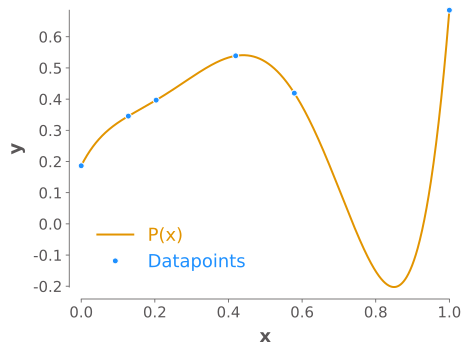

In [ ]:
# Seed the random number generator for consistency
np.random.seed(1)

numDataPoints = 6
numPlotPoints = 1000

# Create a set of randomly spaced points between 0 and 1
xData = np.random.rand(numDataPoints)
xData.sort()
xData = (xData - xData[0]) / (xData[-1] - xData[0])

# Assign random y values between 0 and 1
yData = np.random.rand(numDataPoints)

# Create the interpolating polynomial
P = get_interpolating_func(xData, yData)

# Plot the interpolating polynomial and the data points
fig, ax = plt.subplots()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

xPlot = np.linspace(0, 1, numPlotPoints)
yPlot = P(xPlot)

ax.plot(xPlot, yPlot, label="P(x)", clip_on=False)
ax.plot(xData, yData, "o", label="Datapoints", clip_on=False)

niceplots.adjust_spines(ax)
ax.legend(labelcolor="linecolor")
plt.show()